Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical
from tensorflow.keras.regularizers import l2

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
train_path="gdrive/My Drive/Colab Notebooks/MelanomaCNN/Train/"
test_path="gdrive/My Drive/Colab Notebooks/MelanomaCNN/Test/"
data_dir_train = pathlib.Path(train_path)
data_dir_test = pathlib.Path(test_path)

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2245
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
tf.keras.utils.image_dataset_from_directory(data_dir_train,validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2245 files belonging to 9 classes.
Using 1796 files for training.


<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  label_mode="int",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2245 files belonging to 9 classes.
Using 1796 files for training.


In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  label_mode="int",
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2245 files belonging to 9 classes.
Using 449 files for validation.


In [10]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [11]:
for i in class_names:
  print(i,": ",len(list(data_dir_train.glob('{}/*.jpg'.format(i)))))

actinic keratosis :  114
basal cell carcinoma :  376
dermatofibroma :  95
melanoma :  438
nevus :  363
pigmented benign keratosis :  462
seborrheic keratosis :  77
squamous cell carcinoma :  181
vascular lesion :  139


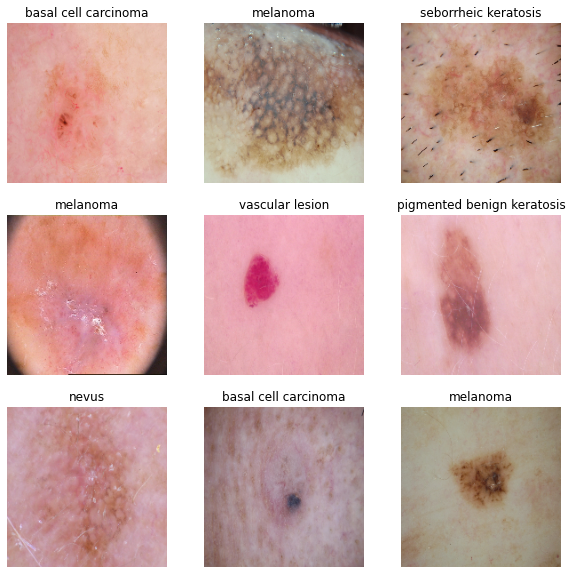

In [12]:
import matplotlib.pyplot as plt

num_classes = 9

class_names = ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

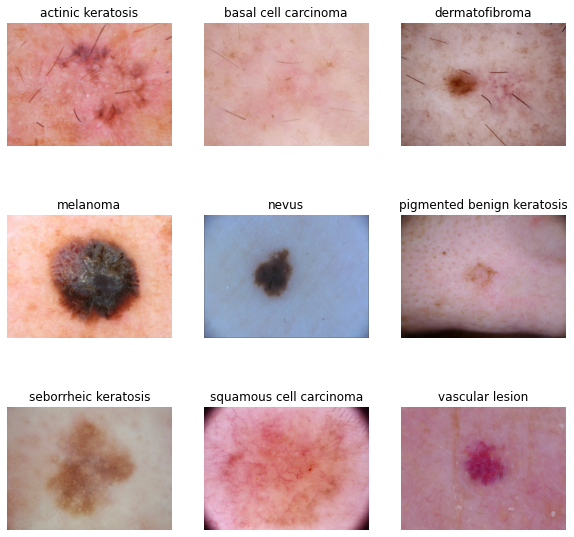

In [13]:
plt.figure(figsize=(10,10))
for index,images in enumerate(class_names):
  
  temp=plt.imread(list(data_dir_train.glob('{}/*.jpg'.format(images)))[0])
  
  plt.subplot(3,3,index+1)
  plt.imshow(temp)
  plt.axis('off')
  plt.title(images)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [15]:
preprocessing_layers = [
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3))
]

In [16]:
### Your code goes here

input_shape = (180,180,3)
lr = 1e-5
init = 'normal'
activ = 'relu'

model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

## Number of classes is 9
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 module_wrapper (ModuleWrapp  (None, 178, 178, 32)     896       
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 176, 176, 32)     9248      
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 88, 88, 32)       0         
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (None, 86, 86, 64)       18496     
 pper)                                                  

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [17]:
### Todo, choose an appropirate optimiser and loss function

optimizer = 'adam'
loss_fn = "binary_crossentropy"
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [19]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 module_wrapper (ModuleWrapp  (None, 178, 178, 32)     896       
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 176, 176, 32)     9248      
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 88, 88, 32)       0         
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (None, 86, 86, 64)       18496     
 pper)                                                  

### Train the model

In [20]:
epochs = 20
batch_size = 32

history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 272s 5s/step - loss: -90117.0859 - accuracy: 0.1704 - val_loss: -91532.2812 - val_accuracy: 0.1492
Epoch 2/20
57/57 [==============================] - 216s 4s/step - loss: -873093.0000 - accuracy: 0.1720 - val_loss: -916477.0625 - val_accuracy: 0.1492
Epoch 3/20
57/57 [==============================] - 218s 4s/step - loss: -3114698.5000 - accuracy: 0.1720 - val_loss: -2450972.0000 - val_accuracy: 0.1492
Epoch 4/20
57/57 [==============================] - 218s 4s/step - loss: -7368501.0000 - accuracy: 0.1720 - val_loss: -6350513.5000 - val_accuracy: 0.1492
Epoch 5/20
57/57 [==============================] - 217s 4s/step - loss: -14670780.0000 - accuracy: 0.1720 - val_loss: -12555068.0000 - val_accuracy: 0.1492
Epoch 6/20
57/57 [==============================] - 218s 4s/step - loss: -25473824.0000 - accuracy: 0.1720 - val_loss: -28430218.0000 - val_accuracy: 0.1492
Epoch 7/20
57/57 [==============================] - 217s 4s/step - loss:

### Visualizing training results

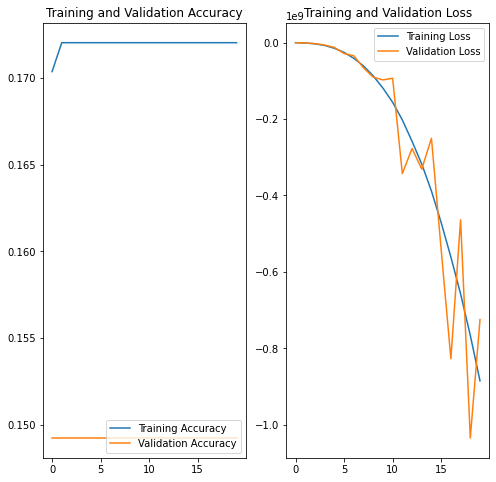

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Model Overfit or Underfit?

In [22]:

loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)


# Thus we can clearly that model Overfit and we need to chose right data augumentation strategy

15/15 [==============================] - 12s 765ms/step - loss: -725028032.0000 - accuracy: 0.1492
Accuracy:  0.17204900085926056
Validation Accuracy:  0.14922049641609192
Loss:  -706298752.0
Validation Loss -725028032.0


In [23]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

image_class = ['nevus','melanoma','basal_cell_caricoma','actinic_keratosis','vasc_lesion','dermatofibroma', 'pigmented_keratosis', 'seborrheic_keratosis', 'squamous_carci']

train_batches = datagen.flow_from_directory(data_dir_train, 
    target_size = (180,180),
    classes = image_class,
    batch_size = 64
 )

valid_batches = datagen.flow_from_directory(data_dir_test, 
    target_size = (180,180),
    classes = image_class,
    batch_size = 64
)


Found 896 images belonging to 9 classes.
Found 48 images belonging to 9 classes.


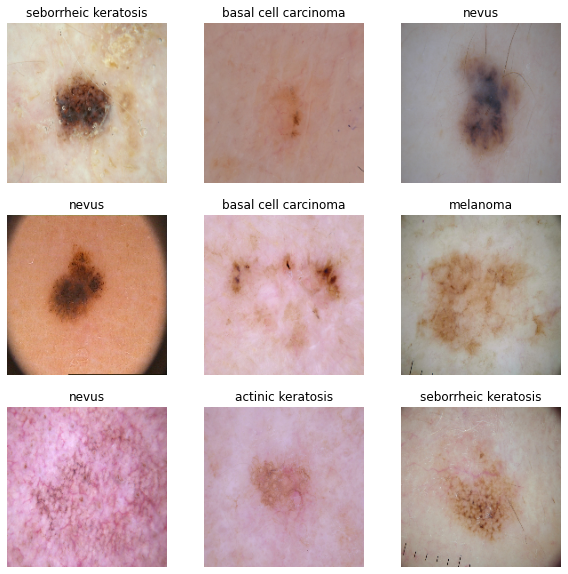

In [24]:
# visualize how your augmentation strategy works for one instance of training image.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


### Create the model, compile and train the model


In [27]:
## You can use Dropout layer if there is an evidence of overfitting in your findings


model = Sequential()

# Increse the model size by adding another 32 layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
# Max Pool size of 2*2
model.add(MaxPooling2D(pool_size=(2, 2)))
# Adding Dropout Layer
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'Same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))





Compile model :

In [28]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
## Your code goes here, note: train your model for 20 epochs
#history = ## your training code

epochs = 20
history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


57/57 [==============================] - 306s 5s/step - loss: 75.3530 - accuracy: 0.1782 - val_loss: 2.1723 - val_accuracy: 0.1871
Epoch 2/20
57/57 [==============================] - 300s 5s/step - loss: 2.1229 - accuracy: 0.1693 - val_loss: 2.1092 - val_accuracy: 0.1871
Epoch 3/20
57/57 [==============================] - 299s 5s/step - loss: 2.0682 - accuracy: 0.1993 - val_loss: 2.0464 - val_accuracy: 0.2027
Epoch 4/20
57/57 [==============================] - 300s 5s/step - loss: 2.0270 - accuracy: 0.1982 - val_loss: 2.0266 - val_accuracy: 0.2027
Epoch 5/20
57/57 [==============================] - 301s 5s/step - loss: 2.0181 - accuracy: 0.1938 - val_loss: 2.0236 - val_accuracy: 0.2027
Epoch 6/20
57/57 [==============================] - 300s 5s/step - loss: 2.0165 - accuracy: 0.2099 - val_loss: 2.0227 - val_accuracy: 0.2027
Epoch 7/20
57/57 [==============================] - 302s 5s/step - loss: 2.0160 - accuracy: 0.1927 - val_loss: 2.0229 - val_accuracy: 0.2027
Epoch 8/20
57/57 [=====

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_43 (ModuleWr  (None, 180, 180, 32)     896       
 apper)                                                          
                                                                 
 module_wrapper_44 (ModuleWr  (None, 180, 180, 32)     9248      
 apper)                                                          
                                                                 
 module_wrapper_45 (ModuleWr  (None, 90, 90, 32)       0         
 apper)                                                          
                                                                 
 module_wrapper_46 (ModuleWr  (None, 90, 90, 32)       0         
 apper)                                                          
                                                                 
 module_wrapper_47 (ModuleWr  (None, 90, 90, 64)      

### Visualizing the results

<built-in method keys of dict object at 0x7f904d6faa00> :


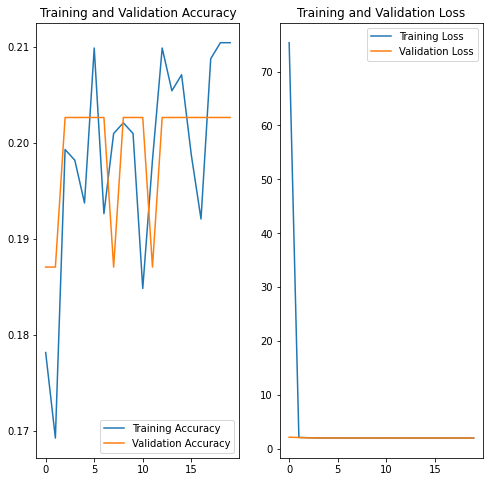

In [31]:
acc = history.history['accuracy']
print(history.history.keys, ":")
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [32]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

15/15 [==============================] - 16s 1s/step - loss: 2.0228 - accuracy: 0.2027
Accuracy:  0.2082405388355255
Validation Accuracy:  0.20267260074615479
Loss:  2.010375499725342
Validation Loss 2.0228476524353027


* Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

We have used 20 epochs here. We could see a very little difference in 
Train Accuracy:  20.82%
Validation Accuracy: 20.26%
But the model accuracy on training and validation has gone down considerably.

* Todo: Find the distribution of classes in the training dataset.

Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.v

In [33]:
## Your code goes here.
totalimages = []

N = 0  # total files
for dirpath, dirnames, filenames in os.walk(data_dir_train):
   #filecount = len(filenames) 
   if(len(filenames) > 0):
     totalimages.append(len(filenames))
   N_c = len(filenames)
   N += N_c
   print ("Files in ", dirpath, N_c)
print ("Total Files ",N)
image_ds = pd.DataFrame({"name":class_names, "totalimages":totalimages})

Files in  gdrive/My Drive/Colab Notebooks/MelanomaCNN/Train 0
Files in  gdrive/My Drive/Colab Notebooks/MelanomaCNN/Train/actinic keratosis 114
Files in  gdrive/My Drive/Colab Notebooks/MelanomaCNN/Train/pigmented benign keratosis 462
Files in  gdrive/My Drive/Colab Notebooks/MelanomaCNN/Train/squamous cell carcinoma 181
Files in  gdrive/My Drive/Colab Notebooks/MelanomaCNN/Train/seborrheic keratosis 77
Files in  gdrive/My Drive/Colab Notebooks/MelanomaCNN/Train/nevus 363
Files in  gdrive/My Drive/Colab Notebooks/MelanomaCNN/Train/melanoma 438
Files in  gdrive/My Drive/Colab Notebooks/MelanomaCNN/Train/basal cell carcinoma 376
Files in  gdrive/My Drive/Colab Notebooks/MelanomaCNN/Train/dermatofibroma 95
Files in  gdrive/My Drive/Colab Notebooks/MelanomaCNN/Train/vascular lesion 139
Total Files  2245


* Todo: Write your findings here:
Which class has the least number of samples?

Ans: Class " seborrheic keratosis" has least number of samples = 77

- Which classes dominate the data in terms proportionate number of samples?

Ans : Classes like "pigmented benign keratosis", "melanoma", "basal cell carcinoma" and "nevus" dominate the data with max samples

Todo: Rectify the class imbalance

Context: You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [34]:
!pip install Augmentor

To use Augmentor, the following general procedure is followed:

1. Instantiate a Pipeline object pointing to a directory containing your initial image data set.
2. Define a number of operations to perform on this data set using your Pipeline object.
3. Execute these operations by calling the Pipeline’s sample() method.

In [35]:
path_to_training_dataset= data_dir_train #"To do"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset / i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/MelanomaCNN/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9045A34750>: 100%|██████████| 500/500 [00:24<00:00, 20.62 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/MelanomaCNN/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F903FE48650>: 100%|██████████| 500/500 [00:22<00:00, 22.03 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/MelanomaCNN/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F903FEAFA10>: 100%|██████████| 500/500 [00:23<00:00, 21.45 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/MelanomaCNN/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F903FF40190>: 100%|██████████| 500/500 [01:59<00:00,  4.19 Samples/s]


Initialised with 363 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/MelanomaCNN/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7F903FE94450>: 100%|██████████| 500/500 [01:36<00:00,  5.16 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/MelanomaCNN/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9045A3C210>: 100%|██████████| 500/500 [00:23<00:00, 21.67 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/MelanomaCNN/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F903FF5F510>: 100%|██████████| 500/500 [00:50<00:00,  9.83 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/MelanomaCNN/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F903FE4D2D0>: 100%|██████████| 500/500 [00:22<00:00, 22.19 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/MelanomaCNN/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F903FEBBCD0>: 100%|██████████| 500/500 [00:23<00:00, 21.67 Samples/s]


In [36]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


Lets see the distribution of augmented data after adding new images to the original training data.

In [37]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['gdrive/My Drive/Colab Notebooks/MelanomaCNN/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030730.jpg_620c55f4-3091-4307-aa3a-a55d83fb3f3a.jpg',
 'gdrive/My Drive/Colab Notebooks/MelanomaCNN/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031228.jpg_f7484a35-0b8c-4686-bba4-3fd0773a3b73.jpg',
 'gdrive/My Drive/Colab Notebooks/MelanomaCNN/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028393.jpg_980504ba-8cfb-4ecb-99b4-4b9ab4bc5783.jpg',
 'gdrive/My Drive/Colab Notebooks/MelanomaCNN/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027172.jpg_fe96e432-f165-441c-b8be-6eb3e2b5477f.jpg',
 'gdrive/My Drive/Colab Notebooks/MelanomaCNN/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026765.jpg_217a12fd-2f58-4ae7-b00f-3517663b3852.jpg',
 'gdrive/My Drive/Colab Notebooks/MelanomaCNN/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025803.jpg_ab4e12de-fa45-4383-8429-27448dc668dd.jpg',
 'gdrive/My Driv

In [38]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [39]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [40]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [41]:
path_list_new[1]

'gdrive/My Drive/Colab Notebooks/MelanomaCNN/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031228.jpg_f7484a35-0b8c-4686-bba4-3fd0773a3b73.jpg'

In [42]:
new_df['Label'].value_counts()

actinic keratosis             500
pigmented benign keratosis    500
squamous cell carcinoma       500
seborrheic keratosis          500
nevus                         500
melanoma                      500
basal cell carcinoma          500
dermatofibroma                500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

Todo: Train the model on the data created using Augmentor

In [43]:
batch_size = 32
img_height = 180
img_width = 180

Todo: Create a training dataset

In [44]:
data_dir_train

PosixPath('gdrive/My Drive/Colab Notebooks/MelanomaCNN/Train')

Todo: Create a training dataset

In [45]:
data_dir_train =  data_dir_train # "path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",  ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6745 files belonging to 9 classes.
Using 5396 files for training.


Todo: Create validation dataset

In [46]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6745 files belonging to 9 classes.
Using 1349 files for validation.


Todo: Create your model (make sure to include normalization)

Model 3:

In [47]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

### Your code goes here

input_shape = (180,180,3)
lr = 1e-5
init = 'normal'
activ = 'relu'

model = Sequential()
#normalisation layer
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
# First Conv layer
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding ='same' ,input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding ='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding ='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding ='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding ='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))

model.add(Dense(9,kernel_regularizer=l2(0.01)))
model.add(Activation('softmax'))

## Number of classes is 9
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_58 (ModuleWr  (None, 180, 180, 16)     448       
 apper)                                                          
                                                                 
 module_wrapper_59 (ModuleWr  (None, 90, 90, 16)       0         
 apper)                                                          
                                                                 
 module_wrapper_60 (ModuleWr  (None, 90, 90, 32)       4640      
 apper)                                                          
                                                                 
 module_wrapper_61 (ModuleWr  (None, 45, 45, 32)       0         
 apper)                                               

Todo: Compile your model (Choose optimizer and loss function appropriately)

In [48]:
## Your code goes here
from tensorflow.keras.optimizers import Adam
### Todo, choose an appropirate optimiser and loss function
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer,
              loss=loss_function,
              metrics=['accuracy'])

In [49]:
#epochs = 20
## Your code goes here
#history = # your model fit code

epochs = 20
history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 238s 1s/step - loss: 1.8002 - accuracy: 0.3058 - val_loss: 1.7508 - val_accuracy: 0.3069
Epoch 2/20
169/169 [==============================] - 232s 1s/step - loss: 1.5970 - accuracy: 0.3892 - val_loss: 1.3814 - val_accuracy: 0.4566
Epoch 3/20
169/169 [==============================] - 236s 1s/step - loss: 1.3930 - accuracy: 0.4501 - val_loss: 1.3026 - val_accuracy: 0.4900
Epoch 4/20
169/169 [==============================] - 233s 1s/step - loss: 1.2867 - accuracy: 0.4972 - val_loss: 1.1443 - val_accuracy: 0.5597
Epoch 5/20
169/169 [==============================] - 236s 1s/step - loss: 1.1208 - accuracy: 0.5663 - val_loss: 1.0765 - val_accuracy: 0.5827
Epoch 6/20
169/169 [==============================] - 235s 1s/step - loss: 0.9501 - accuracy: 0.6318 - val_loss: 1.1226 - val_accuracy: 0.5767
Epoch 7/20
169/169 [==============================] - 233s 1s/step - loss: 0.7987 - accuracy: 0.6970 - val_loss: 0.7758 - val_accuracy: 0.7242
Epoch 8/20

Visualize the Model Results:

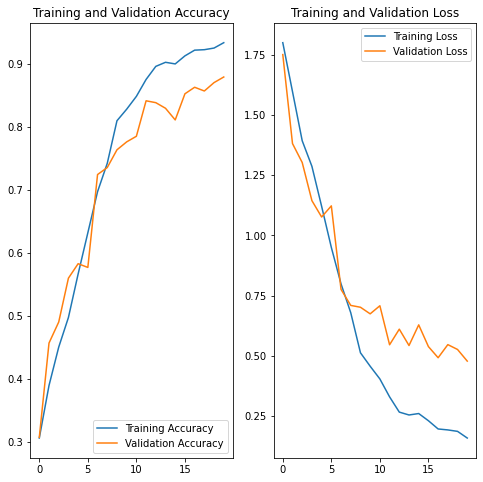

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Finding the Train Accuracy, Validation Accuracy, Loss and Validation and Loss for the model 3:

In [51]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

43/43 [==============================] - 20s 428ms/step - loss: 0.4781 - accuracy: 0.8792
Accuracy:  0.9540400505065918
Validation Accuracy:  0.879169762134552
Loss:  0.10982503741979599
Validation Loss 0.47811728715896606


Todo: Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

* Final model has no overfitting or underfitting
* Training accuracy is 95.40 % and validation accuracy is 87.91 %
* It is observed that there is a significance improvement in training and validation accuracy after using Augmentor and treating imbalance of all the classes
* More epochs can be added to increase the accuracy Further
* Training and validation loss has been decreased with the increase in no of epochs